# Scientific Exploration of Video Game Sales Analytics

# Table of Contents
#### 1. Problem Statement
#### 2. Objective
#### 3. Installing and Importing Libraries
#### 4. Data Aquisition and Description
#### 5. Data Pre-profiling
#### 6. Data Cleaning
#### 7. Data Post-profiling
#### 8. Exploratory Data Analysis
#### 9. Conclusion
#### 10. Actionable Insights

###1. Problem Statement
- The problem at hand is to perform exploratory data analysis (EDA) on a dataset containing information about video game sales. This analysis aims to uncover patterns, trends, and insights within the data, while also addressing missing values and anomalies.

###2. Objective
- The primary objective of this exploratory data analysis is to gain a comprehensive understanding of the video game sales dataset. This includes identifying key statistics, patterns, and correlations among various features. Additionally, the analysis aims to answer questions about top-performing games, platforms, genres, and publishers, as well as to explore sales trends across different regions.

###3. Installing and Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install -q pandas_profiling
from pandas_profiling import ProfileReport

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 76.0 MB/s eta 0:00:00


<ipython-input-3-25e8b845c72f>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


###4. Data Aquisition and Description

 - The data was collected and made available by **Kaggle**.
 - Each row in the dataset represents a game and contains the following features:

  - Rank: Ranking of overall sales
  - Name: The games name
  - Platform: Platform of the games release (i.e. PC,PS4, etc.)
  - Year: Year of the game’s release
  - Genre: Genre of the game
  - Publisher: Publisher of the game
  - NA_Sales: Sales in North America (in millions)
  - EU_Sales: Sales in Europe (in millions)
  - JP_Sales: Sales in Japan (in millions)
  - Other_Sales: Sales in the rest of the world (in millions)
  - Global_Sales: Total worldwide sales.

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/GitHub_Project/Video_Game_Sales_EDA/vgsales.csv'
data = pd.read_csv(path)
print(data.shape)
data.head()

(16598, 11)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
data.isnull().sum().sort_values(ascending=False)

Year            271
Publisher        58
Rank              0
Name              0
Platform          0
Genre             0
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

#### Observation:
- The Year and Publisher columns have some null values present in them, which need to be dealt with.
- The datatype of all columns is correct.

###5. Data Pre-profiling

In [ ]:
profile = ProfileReport(data)
profile.to_file('Pre profiling report.html')
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


#### Observation:
- There are 16598 observations with 11 features.

- There are 7 numeric and 4 categorical features.

- 329 (0.2%) missing cells are present in the dataset.
- No duplicated rows are present in the dataset.

###6. Data Cleaning
 - We will now clean our data by filling in the missing data.

In [ ]:
missing_frame = pd.DataFrame(index = data.columns)
missing_frame['Null Frequency'] = data.isnull().sum().values
nullpercent = data.isnull().sum().values/data.shape[0]
missing_frame['Missing Null %age'] = np.round(nullpercent, decimals = 4) * 100
missing_frame.sort_values(by='Null Frequency',ascending=False).transpose()

,Year,Publisher,Rank,Name,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Null Frequency,271.00,58.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Missing Null %age,1.63,0.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data['Year'] = data['Year'].fillna(data['Year'].median())

In [ ]:
data.dropna(subset=['Publisher'],inplace=True)

In [ ]:
missing_frame = pd.DataFrame(index = data.columns)
missing_frame['Null Frequency'] = data.isnull().sum().values
nullpercent = data.isnull().sum().values/data.shape[0]
missing_frame['Missing Null %age'] = np.round(nullpercent, decimals = 4) * 100
missing_frame.sort_values(by='Null Frequency',ascending=False).transpose()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Null Frequency,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Missing Null %age,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###7. Data Post-profiling

In [ ]:
profile = ProfileReport(data)
profile.to_file('Post profiling report.html')
print('Accomplished!')

#### Observation:
- 0 (0.0%) missing cells are present in the dataset.

###8. Exploratory Data Analysis

####8.1 Distribution of Global_Sales across Year

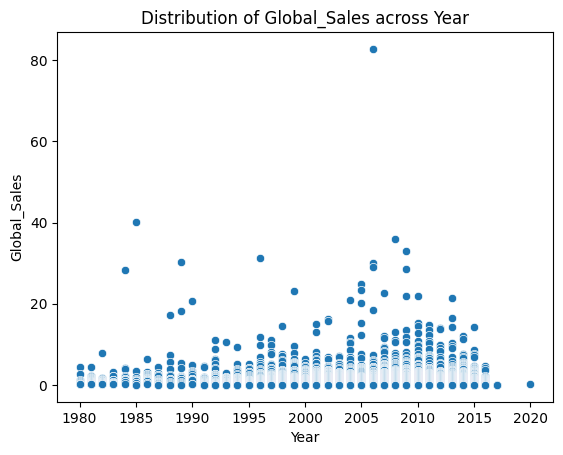

In [ ]:
sns.scatterplot(data=data,x='Year',y='Global_Sales')
plt.title('Distribution of Global_Sales across Year')
plt.show()

#### Observation:
Based on the following scatterplot, it is evident that the majority of game titles achieved global sales of roughly below $15 million, with a few exceptional ones exceeding that threshold. Notably, we can also observe some outliers, including one game released in 2006 that made a significant breakthrough.

####8.2 Total Count of Games for each Platform

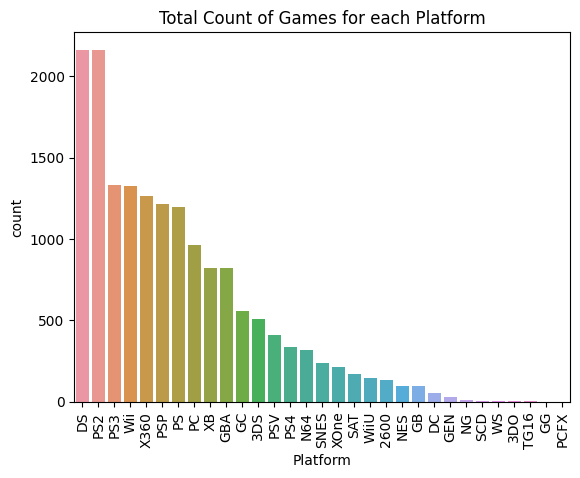

In [ ]:
sns.countplot(data=data,x='Platform',order=data['Platform'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Total Count of Games for each Platform')
plt.show()

#### Observation:
PlayStation 2 and Nintendo DS have the most game titles on their platforms.

####8.3 Total Count of Games for each Genre

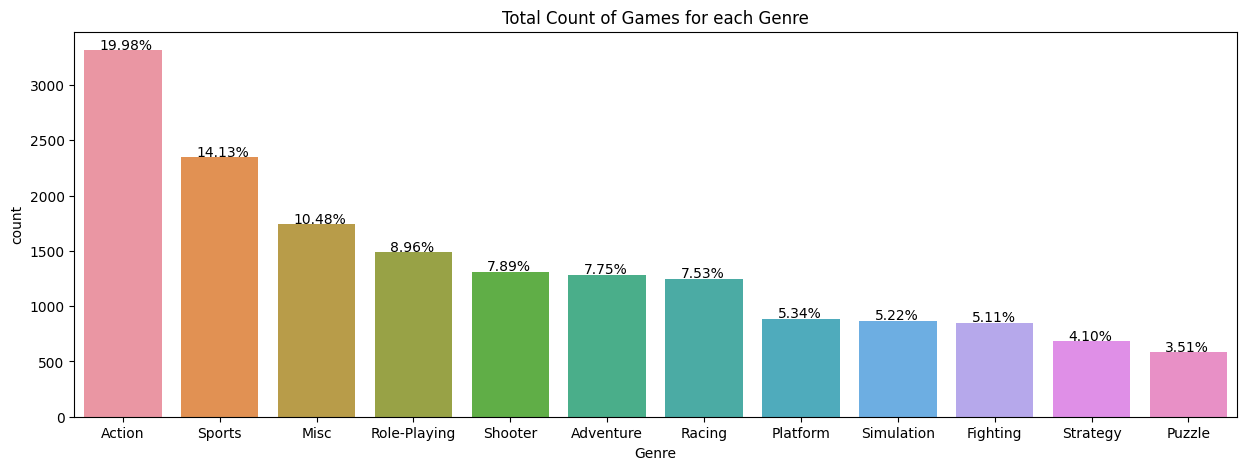

In [ ]:
figure = plt.figure(figsize=[15,5])
ax = sns.countplot(data=data,x='Genre',order=data['Genre'].value_counts().index)
for p in ax.patches:
    total = data.shape[0]
    percentage = '{:.2f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/5
    y = p.get_y() + p.get_height() + 10
    ax.annotate(percentage,(x,y))
plt.xticks(rotation=0)
plt.title('Total Count of Games for each Genre')
plt.show()

#### Observation:
Action seems to be the genre where most game titles can be found, with Sports, Misc, and Role-Playing following not too far behind. Puzzle seems to be the least popular among game developers.

###8.4 Correlation between features

<ipython-input-42-f3e0aa053a12>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=data.corr(),annot=True)


<Axes: >

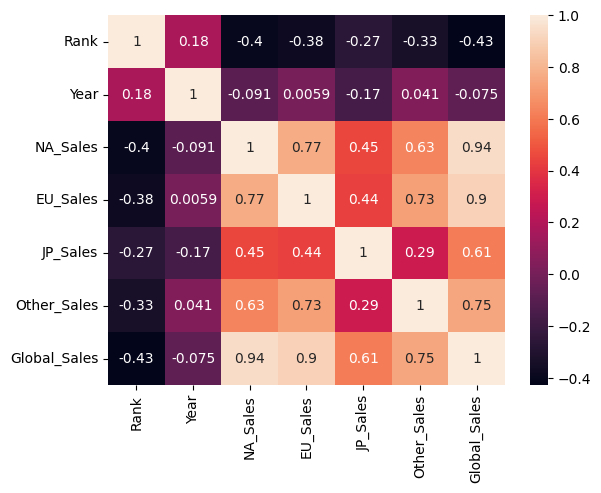

In [ ]:
sns.heatmap(data=data.corr(),annot=True)

#### Observation:
According to the heatmap below, all the sales columns are expected to be correlated with each other. There are no significant correlations between the other columns.

####8.5 What are the top 10 games making the most sales globally?

In [ ]:
data.groupby(['Name'], as_index=False)['Global_Sales'].sum().sort_values(by=['Global_Sales'], ascending=False).reset_index(drop=True).head(10)

,Name,Global_Sales
0,Wii Sports,82.74
1,Grand Theft Auto V,55.92
2,Super Mario Bros.,45.31
3,Tetris,35.84
4,Mario Kart Wii,35.82
5,Wii Sports Resort,33.00
6,Pokemon Red/Pokemon Blue,31.37
7,Call of Duty: Black Ops,31.03
8,Call of Duty: Modern Warfare 3,30.83
9,New Super Mario Bros.,30.01


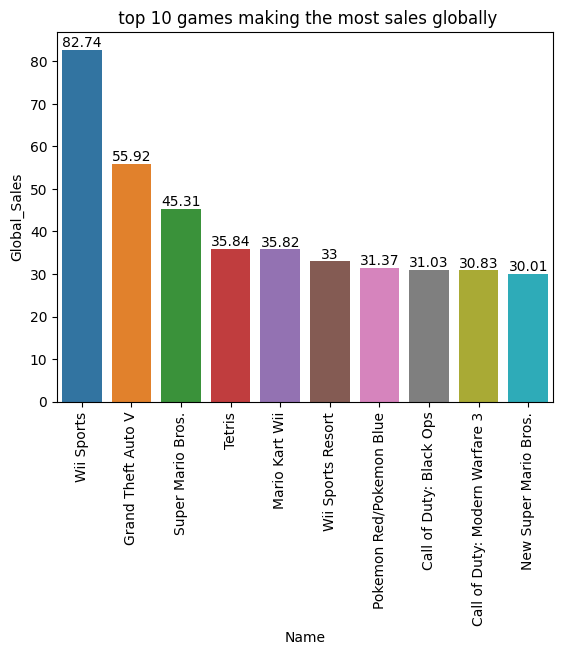

In [ ]:
CP = data.groupby(['Name'], as_index=False)['Global_Sales'].sum().sort_values(by=['Global_Sales'], ascending=False).reset_index(drop=True).head(10)
y = sns.barplot(data=CP,x='Name',y='Global_Sales')
for bars in y.containers:
    y.bar_label(bars)
plt.xticks(rotation=90)
plt.title(' top 10 games making the most sales globally')
plt.show()

####8.6  What are the top 5 gaming Genres that are making high sales?

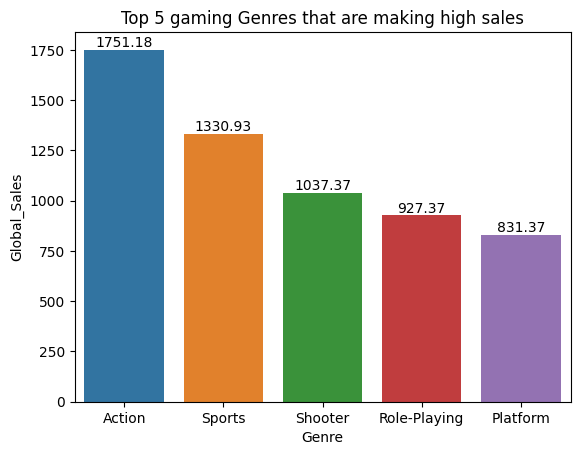

In [ ]:
df = data.groupby(['Genre'], as_index=False)['Global_Sales'].sum().sort_values(by=['Global_Sales'], ascending=False).reset_index(drop=True).head()
y = sns.barplot(data=df,x='Genre',y='Global_Sales')
for bars in y.containers:
    y.bar_label(bars)
plt.title('Top 5 gaming Genres that are making high sales')
plt.show()

#### 8.7 Which game made the most sales per region and globally?

In [ ]:
print('NA :',data.nlargest(1, 'NA_Sales').values[0,1])
print('EU :',data.nlargest(1, 'EU_Sales').values[0,1])
print('JP :',data.nlargest(1, 'JP_Sales').values[0,1])
print('Other :',data.nlargest(1, 'Other_Sales').values[0,1])
print('Global :',data.nlargest(1, 'Global_Sales').values[0,1])

NA : Wii Sports
EU : Wii Sports
JP : Pokemon Red/Pokemon Blue
Other : Grand Theft Auto: San Andreas
Global : Wii Sports


####8.8 Which Publishers made the most sales?

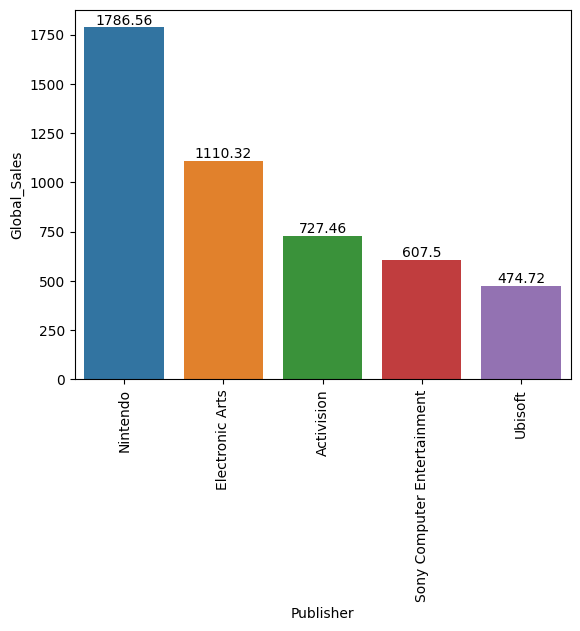

In [ ]:
df = data.groupby(['Publisher'],as_index=False)['Global_Sales'].sum().sort_values(by=['Global_Sales'],ascending=False).reset_index(drop=True).head(5)
y = sns.barplot(data=df,x='Publisher',y='Global_Sales')
for bars in y.containers:
    y.bar_label(bars)
plt.xticks(rotation=90)
plt.show()

###8.9 What PC-FX games were sold?

In [ ]:
data[data['Platform']=='PCFX']

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
14556,14559,Blue Breaker: Ken Yorimo Hohoemi o,PCFX,1996.0,Role-Playing,NEC,0.0,0.0,0.03,0.0,0.03


### 9. Conclusion

- Wii Sports, released in 2006, emerged as the top-selling game worldwide, with significant sales in North America and Europe. However, different games, such as Pokemon Red/Pokemon Blue and Grand Theft Auto: San Andreas, dominated in Japan and other regions, respectively.
- The Wii platform was highly successful, with 50% of the top 10 games utilizing it. The innovative motion controls of the Wii likely contributed to its success.
- Action, Sports, and Shooter genres stood out as the most popular, both in terms of the number of game titles and global sales.
- Nintendo emerged as the leading publisher in terms of global sales, with all of the top 10 games published by Nintendo.
- The PC-FX console had only one game title, which was exclusive to Japan. Surprisingly, this game did not have the lowest sales among the titles in the dataset.

### 10. Actionable Insights


- Publishers should consider focusing on innovative features and gameplay to replicate the success of the Wii platform, as motion controls appeared to be a significant factor in its popularity.
- Game developers should prioritize the Action, Sports, and Shooter genres, as they have a track record of high game titles and global sales.
- Publishers can learn from Nintendo's success and aim to establish a strong brand presence to boost global sales.
- While the PC-FX console had limited success, it's worth exploring the unique aspects of niche consoles and markets to potentially find untapped opportunities.